In [1]:
# Goals is to:
#   read in the sample data file
#   remove funny spellings due to accented vowels not reading correctly in a text file
#   consolidate spellings/languages where appropriate

In [11]:
# Importing Wine Data
#import dependencies
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
#file to load
wine_data_to_load = os.path.join("resources", "sample_data.csv")

In [13]:
#read in the data and store it in DF
wine_df = pd.read_csv(wine_data_to_load)
wine_df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,344,Chile,"Aromas of pumpkin, squash and corn chips are s...",Gran Reserva,80,19,Leyda Valley,NaN,NaN,Michael Schachner,@wineschach,ViÃ±a TarapacÃ¡ 2015 Gran Reserva Chardonnay (...,Chardonnay,ViÃ±a TarapacÃ¡
1,3640,Portugal,Aromas of strawberry sherbet are followed by s...,Estreia,80,8,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Viniverde 2011 Estreia RosÃ© (Vinho Verde),RosÃ©,Viniverde
2,3641,Chile,"Fluffy, sweet aromas of peach, pear and vanill...",Reserve,80,15,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Cuevas del Sur 2010 Reserve Chardonnay (Maule ...,Chardonnay,Cuevas del Sur
3,4556,Italy,"There's a thorny, almost raw quality of fruit ...",Rondineto,80,12,Central Italy,Colli Aprutini,NaN,NaN,NaN,Fattoria Giuseppe Savini 2011 Rondineto Merlot...,Merlot,Fattoria Giuseppe Savini
4,4557,Spain,"With dusty, candied aromas, the bouquet on thi...",Demi Sec,80,14,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Paul Cheneau NV Demi Sec Sparkling (Cava),Sparkling Blend,Paul Cheneau
5,5905,Argentina,"Ashy, green and funky smelling, then sweet, ch...",NaN,80,17,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Bodega Carmine Granata 2009 SÃ©millon (Mendoza),SÃ©millon,Bodega Carmine Granata
6,5906,Argentina,"A rough, pinchy nose with leather and funk is ...",Grand Reserve,80,20,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Cruz Alta 2007 Grand Reserve Malbec (Mendoza),Malbec,Cruz Alta
7,5907,Argentina,"Heavily vegetal and unclean on the nose, then ...",NaN,80,15,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Ricardo Santos 2009 SÃ©millon (Mendoza),SÃ©millon,Ricardo Santos
8,5908,Argentina,"Mute on the nose, but heavy in the mouth, with...",NaN,80,12,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gardel 2009 TorrontÃ©s (Mendoza),TorrontÃ©s,Gardel
9,5909,Argentina,"Medicinal and feral on the nose, then heavy, t...",ColecciÃ³n,80,12,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Alma del Sur 2009 ColecciÃ³n Cabernet Sauvigno...,Cabernet Sauvignon-Malbec,Alma del Sur


In [14]:
wine_df = wine_df.drop(["Unnamed: 0", "taster_twitter_handle"], 1)

C:\Users\SE\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [15]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Chile,"Aromas of pumpkin, squash and corn chips are s...",Gran Reserva,80,19,Leyda Valley,NaN,NaN,Michael Schachner,ViÃ±a TarapacÃ¡ 2015 Gran Reserva Chardonnay (...,Chardonnay,ViÃ±a TarapacÃ¡
1,Portugal,Aromas of strawberry sherbet are followed by s...,Estreia,80,8,Vinho Verde,NaN,NaN,Roger Voss,Viniverde 2011 Estreia RosÃ© (Vinho Verde),RosÃ©,Viniverde
2,Chile,"Fluffy, sweet aromas of peach, pear and vanill...",Reserve,80,15,Maule Valley,NaN,NaN,Michael Schachner,Cuevas del Sur 2010 Reserve Chardonnay (Maule ...,Chardonnay,Cuevas del Sur
3,Italy,"There's a thorny, almost raw quality of fruit ...",Rondineto,80,12,Central Italy,Colli Aprutini,NaN,NaN,Fattoria Giuseppe Savini 2011 Rondineto Merlot...,Merlot,Fattoria Giuseppe Savini
4,Spain,"With dusty, candied aromas, the bouquet on thi...",Demi Sec,80,14,Catalonia,Cava,NaN,Michael Schachner,Paul Cheneau NV Demi Sec Sparkling (Cava),Sparkling Blend,Paul Cheneau


In [16]:
#Basic EDA
# measures of central tendency
# show width/breadth of data distribution

# inspect df
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      99 non-null     object
 1   description  99 non-null     object
 2   designation  56 non-null     object
 3   points       99 non-null     int64 
 4   price        99 non-null     int64 
 5   province     99 non-null     object
 6   region_1     82 non-null     object
 7   region_2     34 non-null     object
 8   taster_name  69 non-null     object
 9   title        99 non-null     object
 10  variety      99 non-null     object
 11  winery       99 non-null     object
dtypes: int64(2), object(10)
memory usage: 9.4+ KB


In [17]:
#measures of central tendency for the numerical columns
wine_df.describe()

,points,price
count,99.0,99.000000
mean,80.0,16.000000
std,0.0,7.835034
min,80.0,5.000000
25%,80.0,11.000000
50%,80.0,15.000000
75%,80.0,19.000000
max,80.0,55.000000


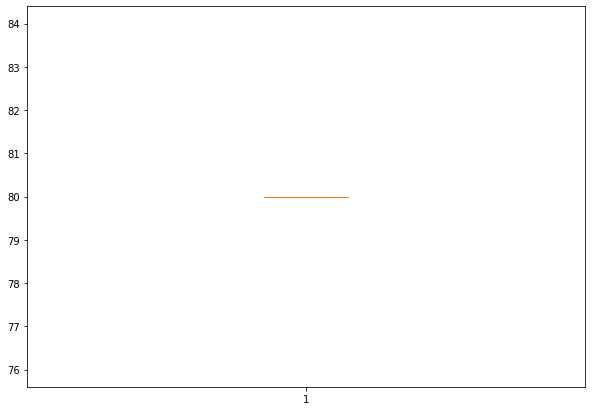

In [19]:
# Creating box and whisker for wine points
data_points = wine_df["points"]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data_points)
 
# show plot
plt.show()

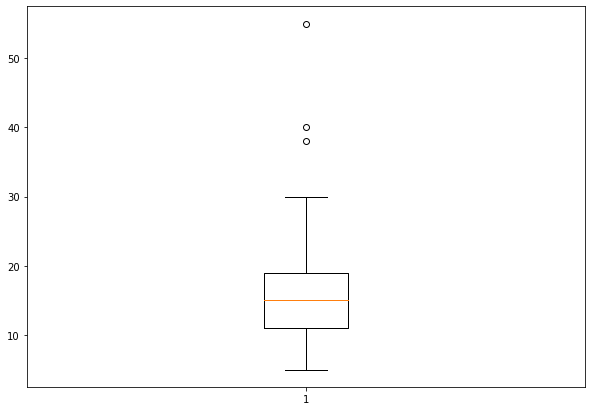

In [20]:
# Creating box and whisker for wine price
data_price = wine_df["price"]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data_price)
 
# show plot
plt.show()

In [38]:
#histogram for wines from various countries

#find which countries are represented in df
x_axis = wine_df["country"].unique()
x_axis

array(['Chile', 'Portugal', 'Italy', 'Spain', 'Argentina', 'US', 'France',
       'Brazil', 'New Zealand', 'Israel'], dtype=object)

In [56]:
#groupby each country
wines_by_country_df = wine_df.groupby(["country"]).count()
y_axis = wines_by_country_df["description"]
y_axis

country
Argentina      20
Brazil          1
Chile          13
France          5
Israel          1
Italy           3
New Zealand     1
Portugal        1
Spain          16
US             38
Name: description, dtype: int64

Text(0.5, 1.0, 'Number of Wines by Country of Origin')

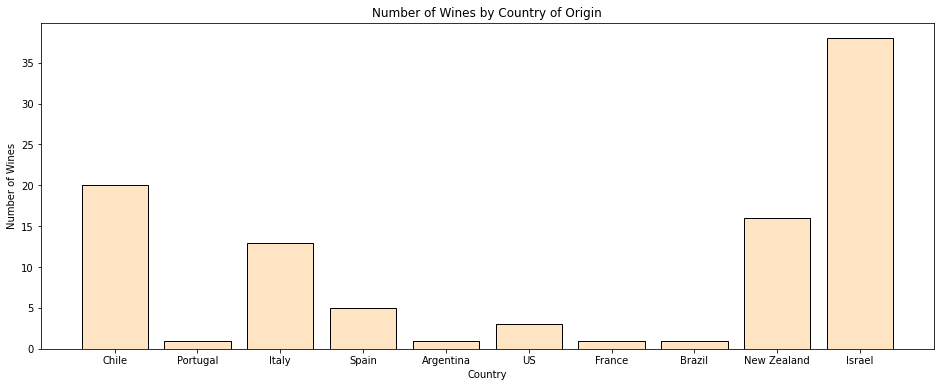

In [57]:
# Create the plot
plt.figure(figsize=(16,6))
plt.bar(x_axis, y_axis, color="bisque", edgecolor="black")
plt.xlabel("Country")
plt.ylabel("Number of Wines")
plt.title("Number of Wines by Country of Origin")

In [ ]:
#Special Character Replacement
#define which columns to run the cleaner on
#define list of special characters
# Use regex to find and replace the special characters
#apply the function to the necessary columns